<a href="https://colab.research.google.com/github/Morilla123/Curso/blob/main/Riesguito_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# importacion de librerias



In [1]:
%%capture
!pip install opencv-python-headless=='4.1.2.30'
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

     |████████████████████████████████| 21.8 MB 59.8 MB/s 


# test

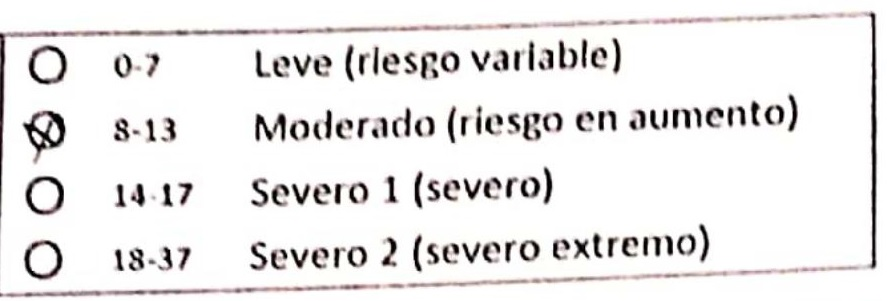

(301, 887, 3)

In [74]:
img = cv2.imread("/content/m1.jpg")
cv2_imshow(img)
img.shape

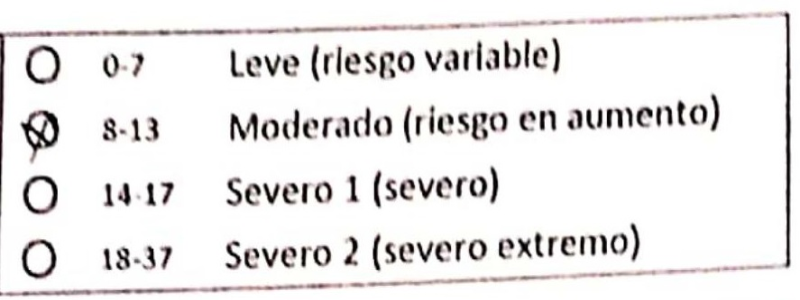

(300, 800, 3)

In [75]:
src = cv2.resize(img, (800, 300))
cv2_imshow(src )
src.shape

In [76]:
hight,width,_ = img.shape

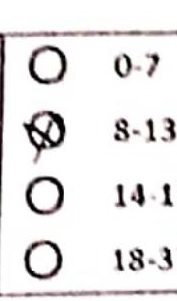

(301, 177, 3)

In [77]:
img2 = img[0:hight,0:int(width/5)]
cv2_imshow(img2 )
img2.shape

In [11]:
if src is None:
    print ('¡Error al abrir la imagen!')

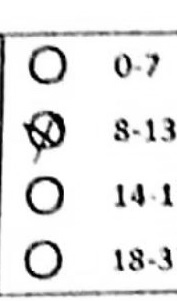

(301, 177)

In [78]:
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
gray.shape

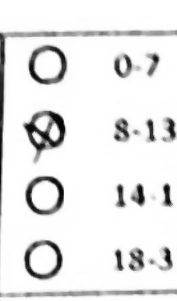

(301, 177)

In [79]:
gray = cv2.medianBlur(gray, 5)
cv2_imshow(gray)
gray.shape

In [80]:
columns = gray.shape[0]
columns

301

# Encontrar los 4 circulos

In [254]:
img = cv2.imread("/content/m2.jpg")
hight,width =  (800, 300)
src = cv2.resize(img,(hight,width))
src = src[0:hight,0:int(width/2.5)]
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)

In [251]:
# cv2_imshow(gray)
# gray.shape
width

300

In [255]:
circles = cv2.HoughCircles(gray,
                           cv2.HOUGH_GRADIENT,
                           1,
                           width/6  ,
                           param1=400,#300
                           param2=18,#15
                            minRadius=18,#15
                            maxRadius=50)#30

print(circles)

[[[ 48.5 262.5  18.6]
  [ 48.5 197.5  18.5]
  [ 48.5 132.5  18.8]
  [ 45.5  66.5  18.8]]]


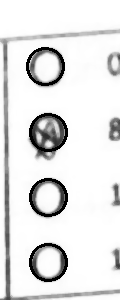

(300, 120)

In [256]:
# circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    cv2.circle(gray,(i[0],i[1]),i[2],(0,255,0),2)

cv2_imshow(gray)
gray.shape

# seleccionar que tipo de riesgo es

In [240]:
 white_pixls = []

In [241]:
sorted_circles = np.expand_dims(circles[0][np.argsort(circles[0][:, 0])], axis=1)
sorted_circles

array([[[ 38.5, 131.5,  25.7]],

       [[ 47.5, 199.5,  17.1]],

       [[ 47.5,  64.5,  16.8]],

       [[ 48.5, 262.5,  18.6]]], dtype=float32)

In [242]:
sorted_circles.shape

(4, 1, 3)

In [243]:
if circles is not None:
    sorted_circles = np.uint16(np.around(sorted_circles))

    for i in sorted_circles[:, 0,:]:
        print(i)
        center = (i[0], i[1])
        radius = i[2]
        asdf = int(radius-(radius/8))
        height,width,_ = src.shape
        circle_img = np.zeros((height,width), np.uint8)
        cv2.circle(circle_img, center, asdf, 1, thickness=-1)
        masked_data = cv2.bitwise_and(src, src, mask=circle_img)



        # cv2_imshow(masked_data)
        
        number_of_white_pix = int(np.sum(masked_data == 255))
        white_pixls.append(number_of_white_pix)
        print('Number of white pixels:', number_of_white_pix)

[ 38 132  26]
Number of white pixels: 294
[ 48 200  17]
Number of white pixels: 35
[48 64 17]
Number of white pixels: 37
[ 48 262  19]
Number of white pixels: 108


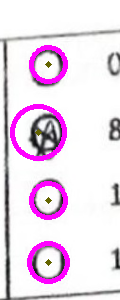

In [244]:
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(src, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(src, center, radius, (255, 0, 255), 3)
    
    cv2_imshow(src)


35
#######################################################
El tipo de riesgo de este expediente es:
1
MODERADO
#######################################################
[294, 35, 37, 108]


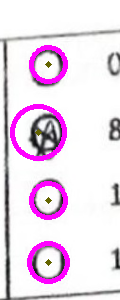

In [245]:
labels = ["LEVE", "MODERADO", "SEVERO 1", "SEVERO 2"]
min_white_value = min(white_pixls)
print(min_white_value)

label = white_pixls.index(min_white_value)
print('#######################################################')
print('El tipo de riesgo de este expediente es:')


print(label)
print(labels[label])
print('#######################################################')
# plt.title(labels[label])
print(white_pixls)
cv2_imshow(src)

# integracion

In [258]:
%%capture
!pip install opencv-python-headless=='4.1.2.30'

In [266]:
from google.colab.patches import cv2_imshow
import sys
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os


In [257]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [289]:
#%%
def main(argv, default_file):

    # default_file = '/content/drive/Shareddrives/ML-IALAB/peru/risk-classificaction/Data/RIESGO2/3010-2020.pdf0001-43.jpg_1_0.jpg'
    white_pixls = []

    filename =  default_file
    # Loads an image
    src = cv.imread(cv.samples.findFile(filename), cv.IMREAD_COLOR)
    # Check if image is loaded fine
    if src is None:
        print ('Error opening image!')
        print ('Usage: hough_circle.py [image_name -- default ' + default_file + '] \n')
        return -1

    hight,width =  (800, 300)
    src = cv2.resize(src, (800, 300))
    src = cv2.resize(img,(hight,width))
    src = src[0:hight,0:int(width/2.5)]

    gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    gray = cv.medianBlur(gray, 5)
    rows = gray.shape[1]
        
    circles = cv2.HoughCircles(gray,
                              cv2.HOUGH_GRADIENT,
                              1,
                              width/6  ,
                              param1=400,#300
                              param2=18,#15
                                minRadius=18,#15
                                maxRadius=50)#30
    # print(circles)


    if circles is not None:
        # print("Number of circles:", len(circles[0]))
        sorted_circles = np.expand_dims(circles[0][np.argsort(circles[0][:, 0])], axis=1)
        sorted_circles = np.uint16(np.around(sorted_circles))

        print("sorted_circles",sorted_circles)
        

        # for i in sorted_circles[0, :]:
        for i in sorted_circles[:, 0,:]:
            center = (i[0], i[1])
            radius = i[2]
            asdf=int(radius-(radius/8))
            height,width,depth = src.shape
            circle_img = np.zeros((height,width), np.uint8)
            cv.circle(circle_img, center, asdf, 1, thickness=-1)
            masked_data = cv.bitwise_and(src, src, mask=circle_img)

            # print("mask")
            # cv2_imshow(masked_data)


            number_of_white_pix = int(np.sum(masked_data == 255))
            white_pixls.append(number_of_white_pix)

            print('Number of white pixels:', number_of_white_pix)


    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            # circle center
            cv.circle(src, center, 1, (0, 100, 100), 3)
            # circle outline
            radius = i[2]
            cv.circle(src, center, radius, (255, 0, 255), 3)


    plt.imshow(src)

    labels = ["LEVE", "MODERADO", "SEVERO 1", "SEVERO 2"]

    min_white_value = min(white_pixls)

    print(min_white_value)

    # label = white_pixls.index(min_white_value)

    # print(labels[label])
    plt.title(labels[label])

    # print(white_pixls)
    # plt.show()
    riesgote=labels[label]
    print(white_pixls,"<-----------")
    return riesgote

# if __name__ == "__main__":



sorted_circles [[[ 46  66  19]]

 [[ 48 262  19]]

 [[ 48 198  18]]

 [[ 48 132  19]]]
Number of white pixels: 37
Number of white pixels: 108
Number of white pixels: 38
Number of white pixels: 1
1
[37, 108, 38, 1] <-----------


'MODERADO'

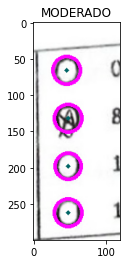

In [290]:
main(sys.argv[1:],'/content/drive/Shareddrives/ML-IALAB/peru/risk-classificaction/Data/RIESGO2/3010-2020.pdf0001-43.jpg_1_0.jpg')

In [ ]:
os.rename("/content/drive/Shareddrives/ML-IALAB/peru/risk-classificaction/Data/RIESGO1/10016-2018.pdf0001-12.jpg_0_1.jpg", 
          "/content/drive/Shareddrives/ML-IALAB/peru/risk-classificaction/clasi/RIESGO1/LEVE/10016-2018.pdf0001-12.jpg_0_1.jpg")

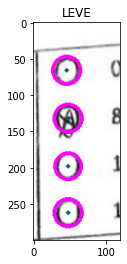

In [273]:
pathR2='/content/drive/Shareddrives/ML-IALAB/peru/risk-classificaction/Data/RIESGO2'
todes=os.listdir('/content/drive/Shareddrives/ML-IALAB/peru/risk-classificaction/Data/RIESGO2')
["Riesgo leve", "Riesgo moderado", "Riesgo severo 1", "Riesgo severo 2"]
pathrl='/content/drive/Shareddrives/ML-IALAB/peru/risk-classificaction/clasi/RIESGO2/LEVE'
pathrm='/content/drive/Shareddrives/ML-IALAB/peru/risk-classificaction/clasi/RIESGO2/MODE'
pathrs1='/content/drive/Shareddrives/ML-IALAB/peru/risk-classificaction/clasi/RIESGO2/SEVE1'
pathrs2='/content/drive/Shareddrives/ML-IALAB/peru/risk-classificaction/clasi/RIESGO2/SEVE2'
raris='/content/drive/Shareddrives/ML-IALAB/peru/risk-classificaction/clasi/RIESGO2/xRaris'
for i in todes:
  try:
      a=main(sys.argv[1:],pathR2+'/'+str(i))
      if a=='Riesgo leve':
        os.rename(pathR2+'/'+str(i), pathrl +'/'+str(i))
      if a=='Riesgo moderado':
        os.rename(pathR2+'/'+str(i), pathrm +'/'+str(i))
      if a=='Riesgo severo 1':
        os.rename(pathR2+'/'+str(i), pathrs1 +'/'+str(i))
      if a=='Riesgo severo 2':
        os.rename(pathR2+'/'+str(i), pathrs2 +'/'+str(i))

  except ValueError:
      os.rename(pathR2+'/'+str(i), raris +'/'+str(i))
  